## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
%matplotlib inline


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2022
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. COMPACT
- **ENGINE SIZE** e.g. 2.4
- **CYLINDERS** e.g 4
- **TRANSMISSION** e.g. AM8
- **FUEL TYPE** e.g. X
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 7
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 8.6
- **FUEL CONSUMPTION COMB (mpg)** e.g. 33
- **CO2 EMISSIONS (g/km)** e.g. 200   --> low --> 0
- **CO2 RATING** e.g. 6
- **SMOG RATING** e.g. 3


<h2 id="reading_data">Reading the data</h2>

In [3]:
df = pd.read_csv('MY2022_Fuel_ConsumptionCo2.csv')

# take a look at the dataset
df.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2_EMISSIONS,CO2_RATING,SMOG_RATING
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,MDX Type S,SUV: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5
3,2022,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,256,5,3
4,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6


In [4]:
# summarize the data
df.describe()

,MODEL_YEAR,ENGINE_SIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2_EMISSIONS,CO2_RATING,SMOG_RATING
count,976.0,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000
mean,2022.0,3.201742,5.691598,12.561373,9.413217,11.144672,27.112705,260.439549,4.512295,4.965164
std,0.0,1.364918,1.935411,3.449886,2.305756,2.882519,7.639681,64.694076,1.473824,1.676631
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.300000,7.700000,9.100000,22.000000,214.000000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.300000,9.200000,10.900000,26.000000,258.000000,4.000000,5.000000
75%,2022.0,4.000000,6.000000,14.700000,10.700000,13.000000,31.000000,302.250000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


Lets select some features that we want to use for regression.

In [5]:
cdf = df[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2_EMISSIONS']]
cdf.head(9)

,ENGINE_SIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2_EMISSIONS
0,2.4,4,9.9,7.0,8.6,200
1,3.5,6,12.6,9.4,11.2,263
2,3.0,6,13.8,11.2,12.4,291
3,3.5,6,11.1,10.8,11.0,256
4,2.0,4,11.0,8.6,9.9,232
5,2.0,4,11.3,9.1,10.3,242
6,2.0,4,11.2,8.0,9.8,230
7,2.0,4,11.3,8.1,9.8,231
8,3.0,6,12.3,9.4,11.0,256


### Scatterplot Matrix:
This matrix allows you to visualize relationships between pairs of variables and can give you a 
quick overview of potential correlations

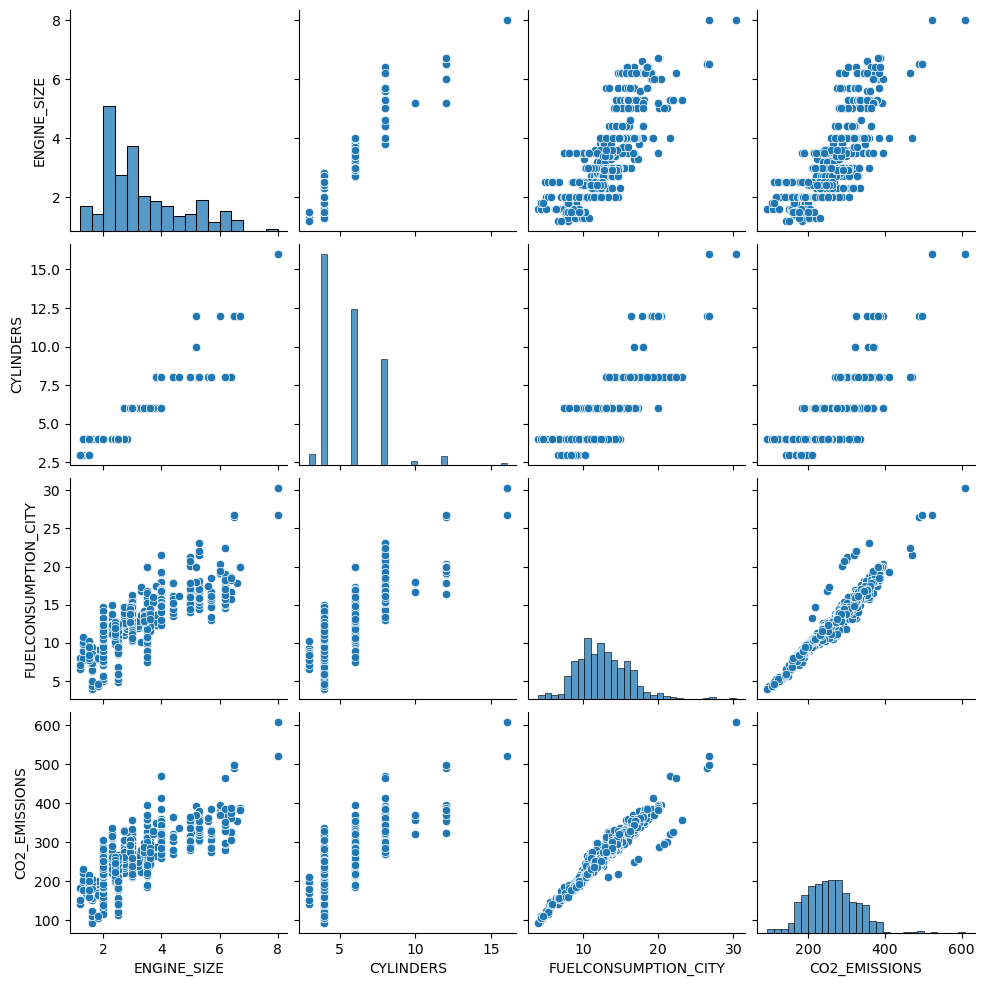

In [6]:
# Assuming df is your dataframe with the specified variables
sns.pairplot(df[['ENGINE_SIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'CO2_EMISSIONS']])
plt.show()

### Correlation Heatmap
Visualizing the correlation matrix can help you understand the linear relationships between variables

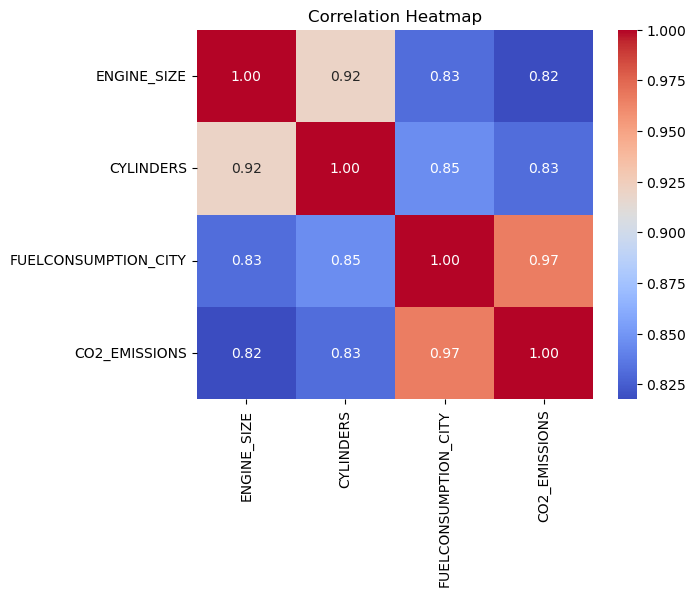

In [7]:
corr_matrix = df[['ENGINE_SIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'CO2_EMISSIONS']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Histogram
we can plot each of these separately features:

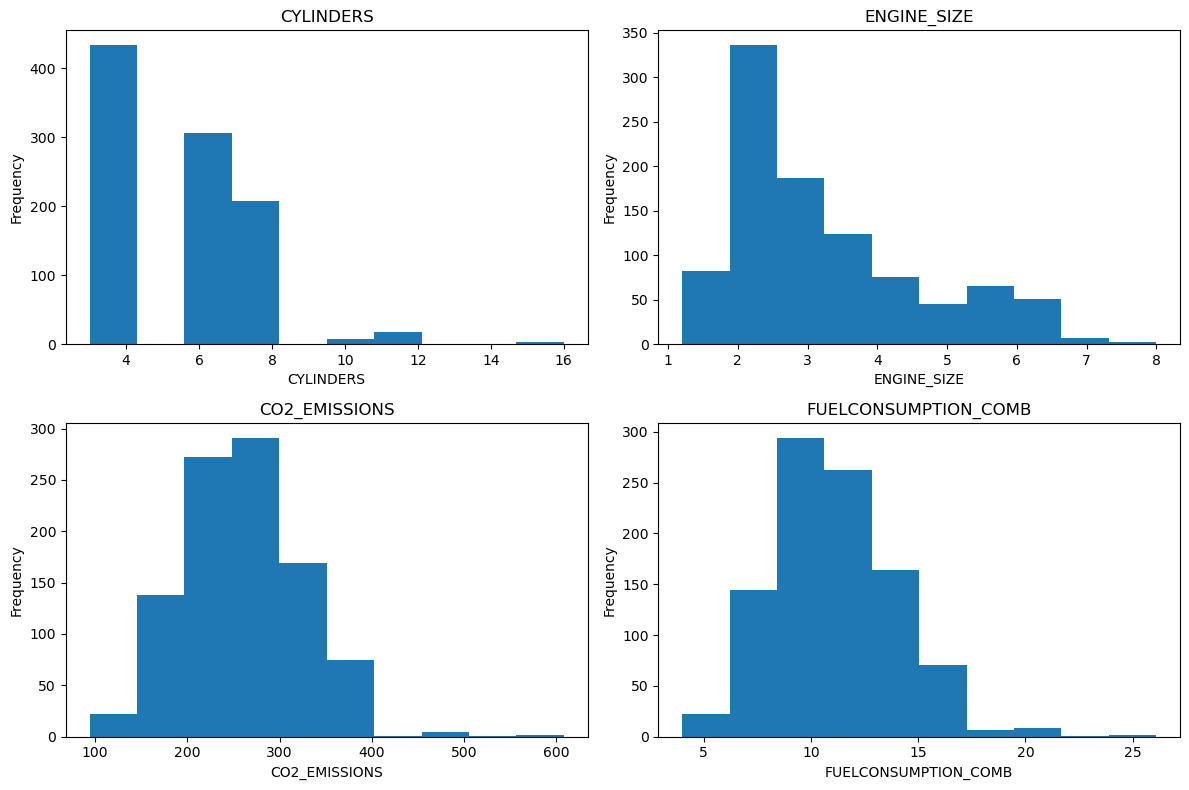

In [8]:
import matplotlib.pyplot as plt

# Select the columns for the histogram
viz = cdf[['CYLINDERS', 'ENGINE_SIZE', 'CO2_EMISSIONS', 'FUELCONSUMPTION_COMB']]

# Create subplots with a specified layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot each histogram on a separate subplot
for i, col in enumerate(viz.columns):
    viz[col].plot(kind='hist', ax=axes[i], title=col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

#plt.grid(True)
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Lets plot Emission values with respect to Engine size:

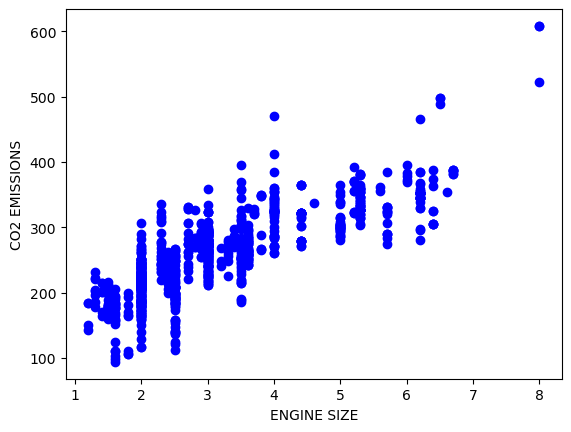

In [9]:
plt.scatter(cdf.ENGINE_SIZE, cdf.CO2_EMISSIONS,  color='blue')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSIONS")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it’s truly an out-of-sample testing.



In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
#train and test are Dfs

#### Train data distribution

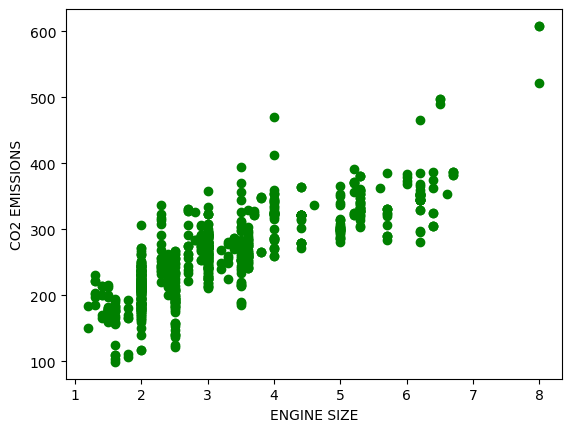

In [11]:
plt.scatter(train.ENGINE_SIZE, train.CO2_EMISSIONS,  color='green')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSIONS")
plt.show()

<h2 id="decision_tree_regression_model">Decision Tree Regression Model</h2>


Decision tree regression is a machine learning technique that uses a decision tree to predict a continuous target variable. Unlike classification trees that predict categorical outcomes, decision tree regression involves partitioning the data into subsets and assigning a numerical value to each subset based on the average or mean of the target variable. This method is effective for capturing complex relationships in non-linear data and is particularly useful for modeling diverse and intricate patterns in numerical predictions.

In [12]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Assuming train is your training dataset
train_x = np.asanyarray(train[['ENGINE_SIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train['CO2_EMISSIONS'])

# Create a DecisionTreeRegressor
regr = DecisionTreeRegressor()
regr.fit(train_x, train_y)

# Print information about the decision tree
# Note: DecisionTreeRegressor does not have intercept_ and coef_
# Instead, you can explore tree-related attributes
print("Number of nodes: ", regr.tree_.node_count)
print("Depth of tree: ", regr.tree_.max_depth)

# If you want to visualize the tree, you can use the following:
from sklearn.tree import export_text
tree_rules = export_text(regr, feature_names=['ENGINE_SIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB'])
#print(tree_rules)


Number of nodes:  759
Depth of tree:  15


<h2 id="prediction">Prediction</h2>

In [13]:
from sklearn.metrics import r2_score

pred_y= regr.predict(test[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_x = np.asanyarray(test[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2_EMISSIONS']])

mse = np.mean((pred_y - test_y) ** 2)

# Calculate the range of CO2 emissions
co2_emissions_range = df['CO2_EMISSIONS'].max() - df['CO2_EMISSIONS'].min()

print(co2_emissions_range)

normalized_mse = mse / co2_emissions_range

print("Residual sum of squares (MSE): %.2f"% np.mean((pred_y - test_y) ** 2))
print(f'Normalized MSE: {normalized_mse}')
print("R2-score: %.2f" % r2_score(pred_y , test_y) )

print("Mean absolute error: %.2f" % np.mean(np.absolute(pred_y - test_y)))

#print("R2-score: %.2f" % r2_score(pred_y , test_y) )

# Explained variance score: 1 is perfect prediction
print('Explained Variance score: %.2f' % regr.score(test_x, test_y))


514
Residual sum of squares (MSE): 7455.98
Normalized MSE: 14.505804105768778
R2-score: 0.97
Mean absolute error: 69.12
Explained Variance score: 0.97


C:\Users\Wahab\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [14]:
r2 = r2_score(pred_y, test_y)

# Convert R-squared to percentage
accuracy_percentage = r2 * 100

print('Accuracy (R-squared): {:.2f}%'.format(accuracy_percentage))


Accuracy (R-squared): 97.34%


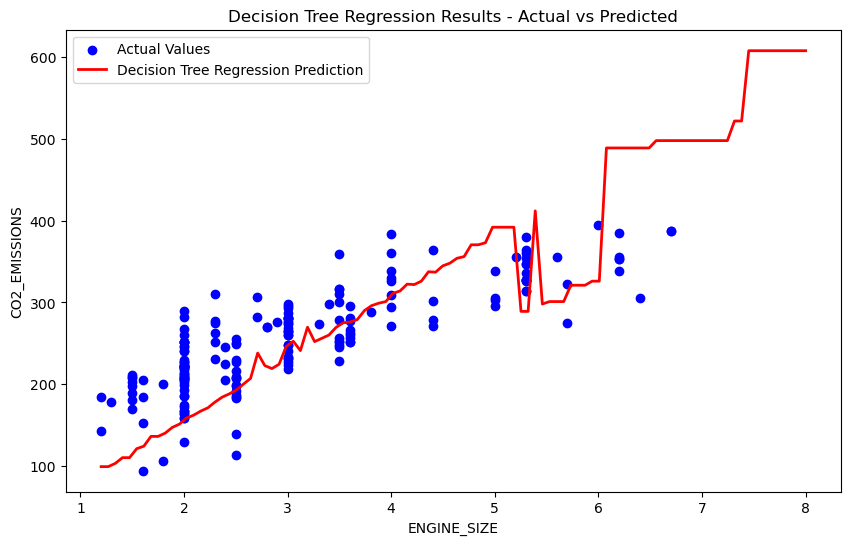

In [15]:
# Generate a range of values for ENGINE_SIZE, CYLINDERS, and FUELCONSUMPTION_COMB
# This will be used for creating a smoother curve
engine_size_range = np.linspace(min(df['ENGINE_SIZE']), max(df['ENGINE_SIZE']), 100).reshape(-1, 1)
cylinders_range = np.linspace(min(df['CYLINDERS']), max(df['CYLINDERS']), 100).reshape(-1, 1)
fuel_consumption_range = np.linspace(min(df['FUELCONSUMPTION_COMB']), max(df['FUELCONSUMPTION_COMB']), 100).reshape(-1, 1)

# Create a grid of values for prediction
grid_values = np.column_stack((engine_size_range, cylinders_range, fuel_consumption_range))

# Make predictions on the grid
predicted_values = regr.predict(grid_values)

# Plot the actual versus predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of actual values
plt.scatter(test_x[:, 0], test_y, color='blue', label='Actual Values')

# Line plot of predicted values
plt.plot(grid_values[:, 0], predicted_values, color='red', linewidth=2, label='Decision Tree Regression Prediction')

plt.title('Decision Tree Regression Results - Actual vs Predicted')
plt.xlabel('ENGINE_SIZE')
plt.ylabel('CO2_EMISSIONS')
plt.legend()
plt.show()

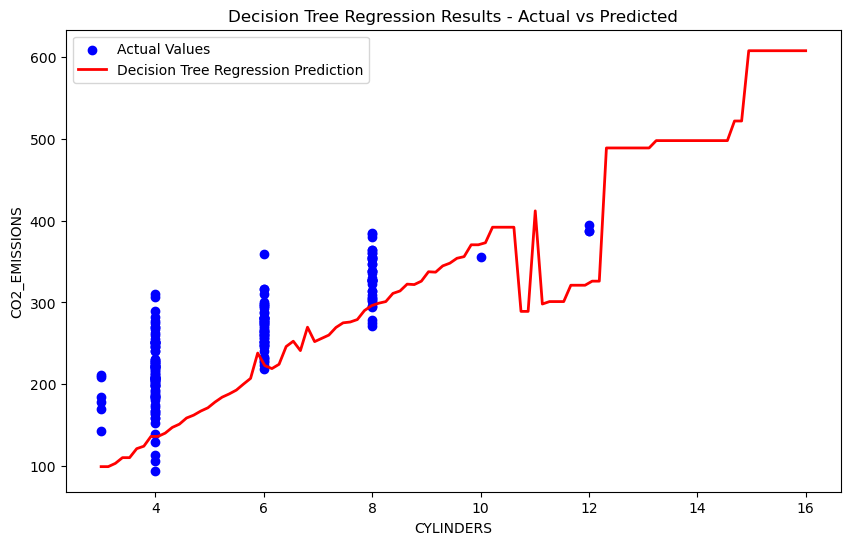

In [16]:
# Plot the actual versus predicted values
plt.figure(figsize=(10, 6))
# Scatter plot of actual values
plt.scatter(test_x[:, 1], test_y, color='blue', label='Actual Values')

# Line plot of predicted values
plt.plot(grid_values[:, 1], predicted_values, color='red', linewidth=2, label='Decision Tree Regression Prediction')

plt.title('Decision Tree Regression Results - Actual vs Predicted')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2_EMISSIONS')
plt.legend()
plt.show()

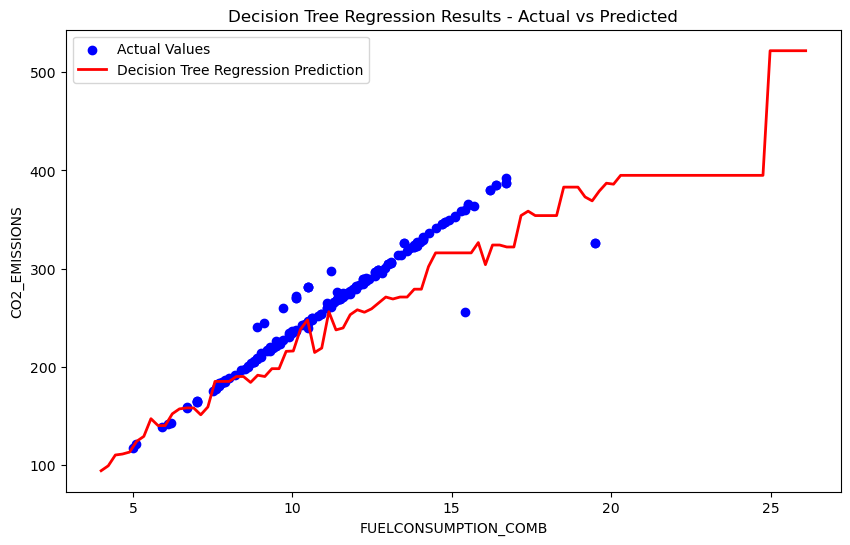

In [26]:
# Plot the actual versus predicted values
plt.figure(figsize=(10, 6))
# Scatter plot of actual values
plt.scatter(test_x[:, 2], test_y, color='blue', label='Actual Values')

# Line plot of predicted values
plt.plot(grid_values[:, 2], predicted_values, color='red', linewidth=2, label='Decision Tree Regression Prediction')

plt.title('Decision Tree Regression Results - Actual vs Predicted')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2_EMISSIONS')
plt.legend()
plt.show()

__Explained Variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.

<h2 id="2nd Iteration">2nd Iteration</h2>

Trying a decision tree regression with the same dataset but this time using __FUEL CONSUMPTION in CITY__ instead of FUELCONSUMPTION_COMB to check if it has better accuracy..

In [27]:
x1 = np.asanyarray(train[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
y1 = np.asanyarray(train[['CO2_EMISSIONS']])
regr.fit (x1, y1)

y1_pred= regr.predict(test[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
x1 = np.asanyarray(test[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
y1 = np.asanyarray(test[['CO2_EMISSIONS']])


print("Residual sum of squares (MSE): %.2f"% np.mean((y1_pred - y1) ** 2))
print("R2-score: %.2f" % r2_score(y1_pred , y1) )

print("Mean absolute error: %.2f" % np.mean(np.absolute(y1_pred - y1)))

#print("R2-score: %.2f" % r2_score(pred_y , test_y) )

# Explained variance score: 1 is perfect prediction
print('Explained Variance score: %.2f' % regr.score(x1, y1))

Residual sum of squares (MSE): 7167.27
R2-score: 0.90
Mean absolute error: 67.53
Explained Variance score: 0.89


C:\Users\Wahab\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [28]:
r2 = r2_score(y1_pred, y1)

# Convert R-squared to percentage
accuracy_percentage = r2 * 100

print('Accuracy (R-squared): {:.2f}%'.format(accuracy_percentage))


Accuracy (R-squared): 89.71%
